In [1]:
import numpy as np
import matplotlib.pyplot as plt

Define a class for the harmonic oscillator

In [3]:
class HarmonicOscillator:
    def hermite(self, n, gamma):
        """
        Returns the value of the nth Hermite polynomial evaluated on gamma
        
        Parameters
        ----------
        n: int
            The nth Hermite polynomial
            
        gamma: float
            The value to calculate with the Hermite polynomial
            
        Raises
        ------
        Exception
            Raises an exception if the nth Hermite polynomial is not
            supported.
        """
        if n == 0:
            return 1
        elif n == 1:
            return 2 * gamma
        elif n == 2:
            return 4 * gamma ** 2 - 2
        elif n == 3:
            return 8 * gamma ** 3 - 12 * gamma
        elif n == 4:
            return 16 * gamma ** 4 - 48 * gamma ** 2 + 12
        elif n == 5:
            return 32 * gamma ** 5 - 160 * gamma ** 3 + 120 * gamma
        elif n == 6:
            return 64 * gamma ** 6 - 480 * gamma ** 4 + 720 * gamma ** 2 - 120
        else:
            raise Exception(f'Hermite polynomial {n} is not supported')

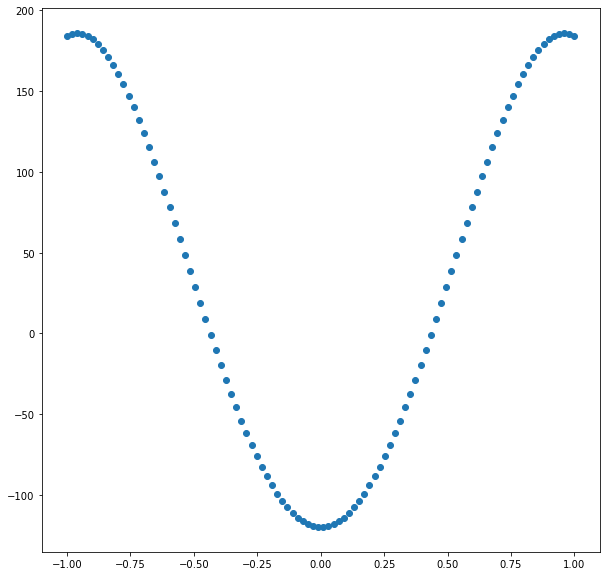

In [11]:
ho = HarmonicOscillator()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
xs = np.linspace(-1, 1, 100)
ys = [ho.hermite(6, x) for x in xs]
ax.scatter(xs, ys)